In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("hypothyroid.csv")

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3772 non-null   object
 1   sex                        3772 non-null   object
 2   on thyroxine               3772 non-null   object
 3   query on thyroxine         3772 non-null   object
 4   on antithyroid medication  3772 non-null   object
 5   sick                       3772 non-null   object
 6   pregnant                   3772 non-null   object
 7   thyroid surgery            3772 non-null   object
 8   I131 treatment             3772 non-null   object
 9   query hypothyroid          3772 non-null   object
 10  query hyperthyroid         3772 non-null   object
 11  lithium                    3772 non-null   object
 12  goitre                     3772 non-null   object
 13  tumor                      3772 non-null   object
 14  hypopitu

In [3]:
df.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,P
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,P
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,P
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,P


In [4]:
df.isnull().sum()

age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured                 0
TSH                          0
T3 measured                  0
T3                           0
TT4 measured                 0
TT4                          0
T4U measured                 0
T4U                          0
FTI measured                 0
FTI                          0
TBG measured                 0
TBG                          0
referral source              0
binaryClass                  0
dtype: int64

In [5]:
total_duplicates = df.duplicated().sum()


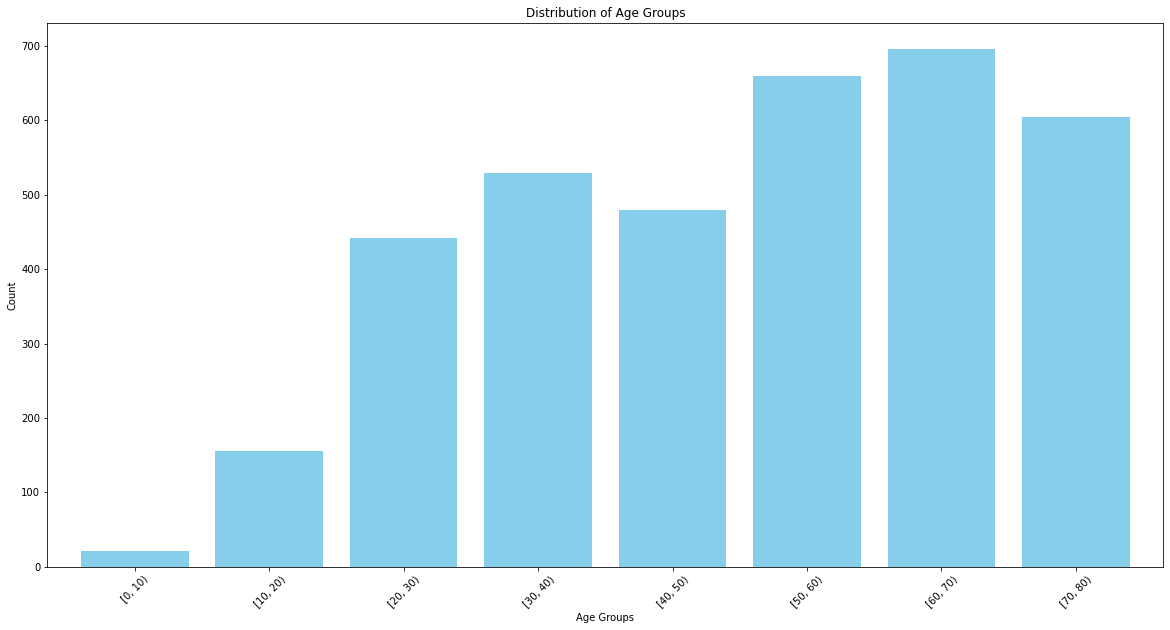

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# Convert 'age' column to numeric values
df['age'] = pd.to_numeric(df['age'], errors='coerce')

# Define custom age bins
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]

# Create a new column 'age_group' in your DataFrame based on the custom bins
df['age_group'] = pd.cut(df['age'], bins=age_bins, right=False)

plt.figure(figsize=(20, 10))
df['age_group'].value_counts().sort_index().plot(kind='bar', color='skyblue', width=0.8)

plt.title('Distribution of Age Groups')
plt.xlabel('Age Groups')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

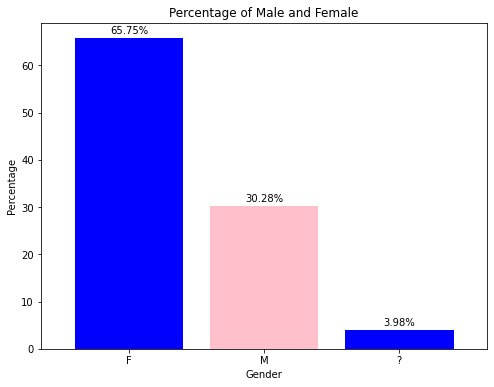

In [7]:
# Calculate the percentage of each gender
gender_percentage = df['sex'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 6))
gender_percentage.plot(kind='bar', color=['blue', 'pink'], width=0.8)

plt.title('Percentage of Male and Female')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed

# Display percentage values on top of the bars
for index, value in enumerate(gender_percentage):
    plt.text(index, value + 0.5, f'{value:.2f}%', ha='center', va='bottom')

plt.show()

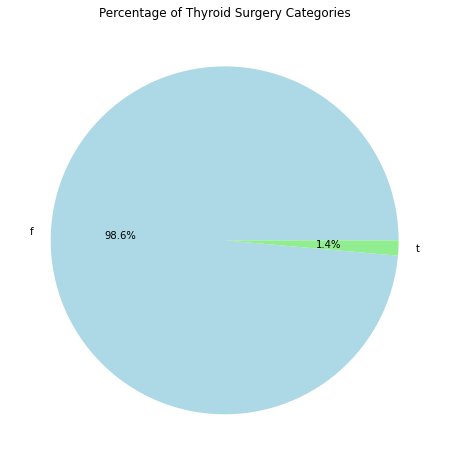

In [8]:
# Calculate the percentage of each category in the 'thyroid_surgery' column
thyroid_surgery_percentage = df['thyroid surgery'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 8))
plt.pie(thyroid_surgery_percentage, labels=thyroid_surgery_percentage.index, autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral'])

plt.title('Percentage of Thyroid Surgery Categories')
plt.show()

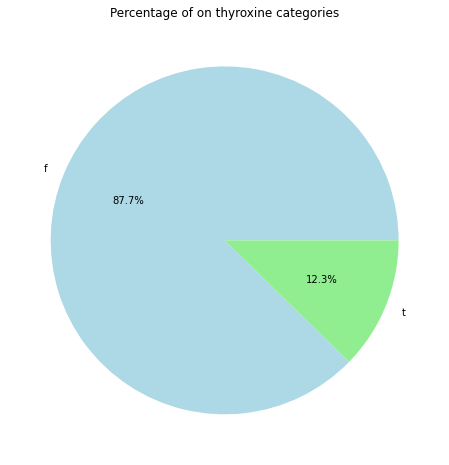

In [9]:

thyroid_percentage = df['on thyroxine'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 8))
plt.pie(thyroid_percentage, labels=thyroid_percentage.index, autopct='%1.1f%%', colors=['lightblue', 'lightgreen'])

plt.title('Percentage of on thyroxine categories')
plt.show()

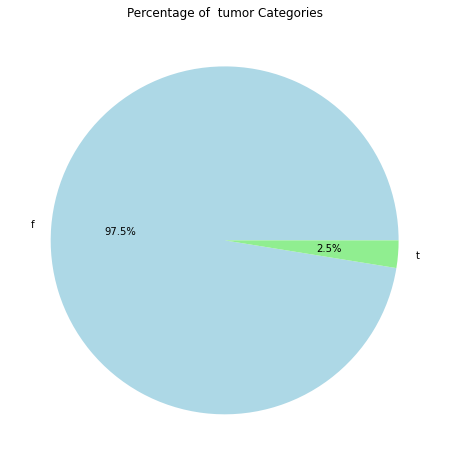

In [10]:
# Calculate the percentage of each category in the 'thyroid_surgery' column
thyroid_surgery_percentage = df['tumor'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 8))
plt.pie(thyroid_surgery_percentage, labels=thyroid_surgery_percentage.index, autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral'])

plt.title('Percentage of  tumor Categories')
plt.show()

In [11]:

df['TSH'] = pd.to_numeric(df['TSH'], errors='coerce')

# Calculate the mean and median of 'TSH'
tsh_mean = df['TSH'].mean()
tsh_median = df['TSH'].median()

# Print the mean and median values
print(f'Mean TSH: {tsh_mean:.2f}')
print(f'Median TSH: {tsh_median:.2f}')


Mean TSH: 5.09
Median TSH: 1.40


In [12]:

df['TSH'] = pd.to_numeric(df['TSH'], errors='coerce')

# Group the DataFrame by 'sex'
grouped_data = df.groupby('sex')['TSH']

# Calculate mean and median for each group
mean_by_sex = grouped_data.mean()
median_by_sex = grouped_data.median()  # Use median() instead of Variance()

# Print the results
print(f'Mean TSH for Males: {mean_by_sex["M"]:.2f}')
print(f'Median TSH for Males: {median_by_sex["M"]:.2f}')

print(f'Mean TSH for Females: {mean_by_sex["F"]:.2f}')
print(f'Median TSH for Females: {median_by_sex["F"]:.2f}')

Mean TSH for Males: 3.79
Median TSH for Males: 1.30
Mean TSH for Females: 5.58
Median TSH for Females: 1.40


most of females hyper & most of males hypo 

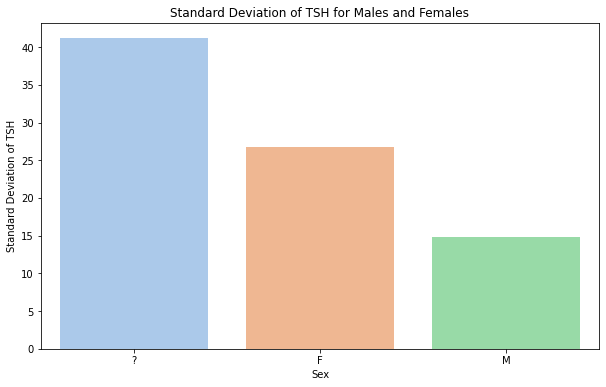

In [14]:
# Convert 'TSH' column to numeric
df['TSH'] = pd.to_numeric(df['TSH'], errors='coerce')

# Group the DataFrame by 'sex'
grouped_data = df.groupby('sex')['TSH']

# Calculate standard deviation for each group
std_by_sex = grouped_data.std()

# Create a grouped bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=std_by_sex.index, y=std_by_sex, palette='pastel')

# Set plot labels and title
plt.xlabel('Sex')
plt.ylabel('Standard Deviation of TSH')
plt.title('Standard Deviation of TSH for Males and Females')

# Show the plot
plt.show()

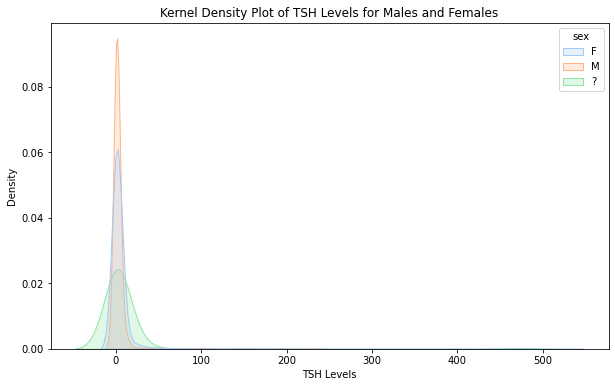

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'TSH' and 'sex' are the correct column names
# Convert 'TSH' column to numeric
df['TSH'] = pd.to_numeric(df['TSH'], errors='coerce')

# Create kernel density plots for males and females
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='TSH', hue='sex', fill=True, palette='pastel', common_norm=False)

# Set plot labels and title
plt.xlabel('TSH Levels')
plt.ylabel('Density')
plt.title('Kernel Density Plot of TSH Levels for Males and Females')

# Show the plot
plt.show()


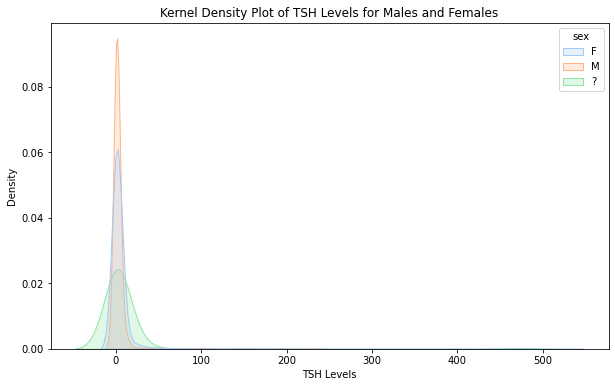

In [16]:
# Convert 'TSH' column to numeric
df['TSH'] = pd.to_numeric(df['TSH'], errors='coerce')

# Group the DataFrame by 'sex'
grouped_data = df.groupby('sex')['TSH']

# Calculate kurtosis for each group
kurtosis_by_sex = grouped_data.apply(pd.DataFrame.kurtosis)

# Create kernel density plots for males and females
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='TSH', hue='sex', fill=True, palette='pastel', common_norm=False)

# Set plot labels and title
plt.xlabel('TSH Levels')
plt.ylabel('Density')
plt.title('Kernel Density Plot of TSH Levels for Males and Females')

# Show the plot
plt.show()

In [17]:
df['TSH'] = pd.to_numeric(df['TSH'], errors='coerce')

# Group the DataFrame by 'sex'
grouped_data = df.groupby('sex')['TSH']

# Calculate kurtosis for each group
kurtosis_by_sex = grouped_data.apply(pd.DataFrame.kurtosis)

# Print the kurtosis values
print(f'Kurtosis for Males: {kurtosis_by_sex["M"]:.2f}')
print(f'Kurtosis for Females: {kurtosis_by_sex["F"]:.2f}')

Kurtosis for Males: 115.42
Kurtosis for Females: 210.59


more extreme values in the dataset than would be expected under a normal distribution

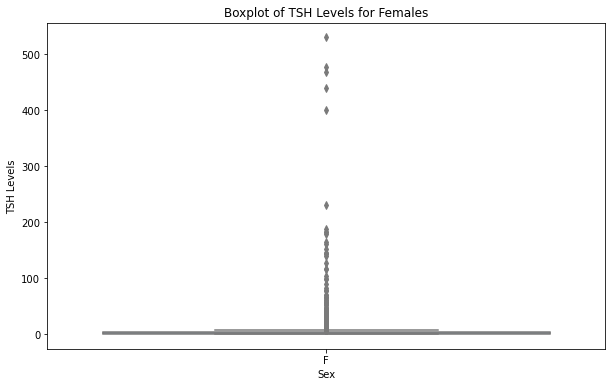

In [19]:
import seaborn as sns

df['TSH'] = pd.to_numeric(df['TSH'], errors='coerce')

# Filter the DataFrame for females
female_data = df[df['sex'] == 'F']

# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='sex', y='TSH', data=female_data, palette='pastel')

# Set plot labels and title
plt.xlabel('Sex')
plt.ylabel('TSH Levels')
plt.title('Boxplot of TSH Levels for Females')

# Show the plot
plt.show()


C:\Users\DELL\AppData\Local\Temp/ipykernel_13164/4214915551.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  female_data['age_group'] = pd.cut(female_data['age'], bins=range(0, 101, 10), right=False)


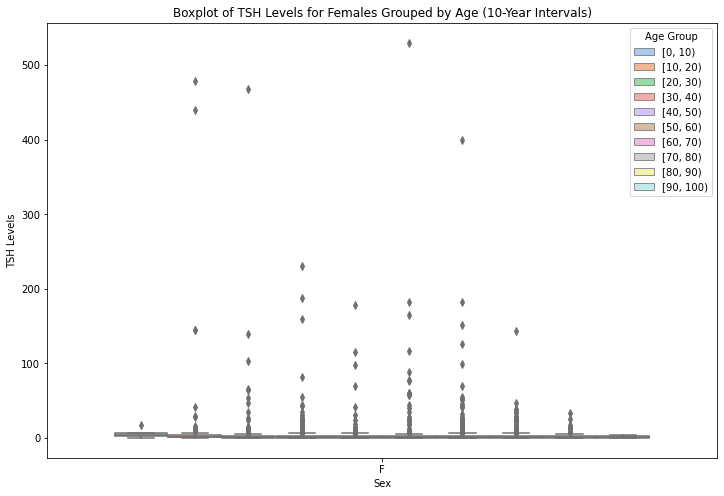

In [20]:
import matplotlib.pyplot as plt

# Assuming 'TSH', 'sex', and 'age' are the correct column names
# Convert 'TSH' column to numeric
df['TSH'] = pd.to_numeric(df['TSH'], errors='coerce')

# Filter the DataFrame for females
female_data = df[df['sex'] == 'F']

# Create a new column for age groups (grouped in 10-year intervals)
female_data['age_group'] = pd.cut(female_data['age'], bins=range(0, 101, 10), right=False)

# Create a boxplot with 'sex' on x-axis and 'age_group' as hue
plt.figure(figsize=(12, 8))
sns.boxplot(x='sex', y='TSH', hue='age_group', data=female_data, palette='pastel')

# Set plot labels and title
plt.xlabel('Sex')
plt.ylabel('TSH Levels')
plt.title('Boxplot of TSH Levels for Females Grouped by Age (10-Year Intervals)')

# Show the legend
plt.legend(title='Age Group', loc='upper right')

# Show the plot
plt.show()

C:\Users\DELL\AppData\Local\Temp/ipykernel_13164/1082995349.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  female_data['age_group'] = pd.cut(female_data['age'], bins=range(0, 101, 10), right=False)


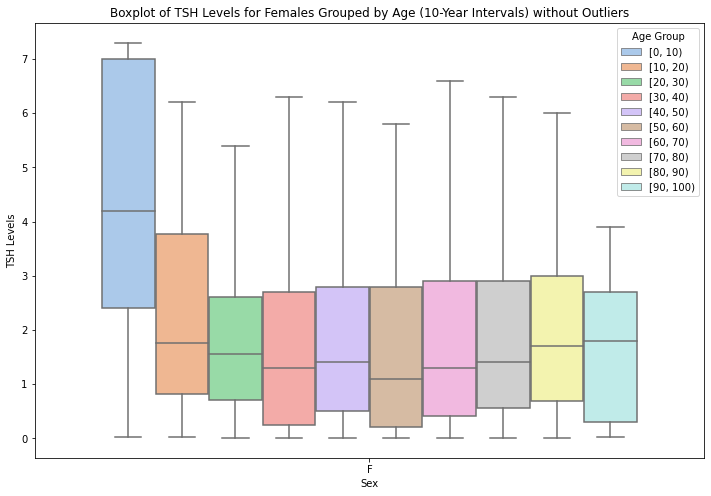

In [21]:
# Convert 'TSH' column to numeric
df['TSH'] = pd.to_numeric(df['TSH'], errors='coerce')

# Filter the DataFrame for females
female_data = df[df['sex'] == 'F']

# Create a new column for age groups (grouped in 10-year intervals)
female_data['age_group'] = pd.cut(female_data['age'], bins=range(0, 101, 10), right=False)

# Create a boxplot with 'sex' on x-axis and 'age_group' as hue, excluding outliers
plt.figure(figsize=(12, 8))
sns.boxplot(x='sex', y='TSH', hue='age_group', data=female_data, palette='pastel', showfliers=False)

# Set plot labels and title
plt.xlabel('Sex')
plt.ylabel('TSH Levels')
plt.title('Boxplot of TSH Levels for Females Grouped by Age (10-Year Intervals) without Outliers')

# Show the legend
plt.legend(title='Age Group', loc='upper right')

# Show the plot
plt.show()

In [22]:
# Assuming 'TSH' is the column with outliers
Q1 = female_data['TSH'].quantile(0.25)
Q3 = female_data['TSH'].quantile(0.75)
IQR = Q3 - Q1

# Filter out values outside the IQR range
female_data_no_outliers = female_data[(female_data['TSH'] >= Q1 - 1.5 * IQR) & (female_data['TSH'] <= Q3 + 1.5 * IQR)]

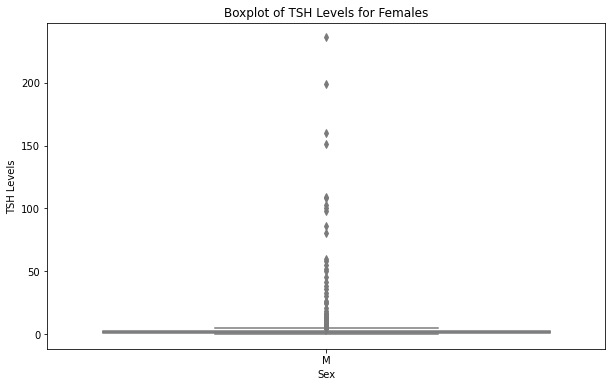

In [23]:
import seaborn as sns

df['TSH'] = pd.to_numeric(df['TSH'], errors='coerce')

# Filter the DataFrame for females
female_data = df[df['sex'] == 'M']

# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='sex', y='TSH', data=female_data, palette='pastel')

# Set plot labels and title
plt.xlabel('Sex')
plt.ylabel('TSH Levels')
plt.title('Boxplot of TSH Levels for Females')

# Show the plot
plt.show()

C:\Users\DELL\AppData\Local\Temp/ipykernel_13164/3618897352.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  male_data['age_group'] = pd.cut(male_data['age'], bins=range(0, 101, 10), right=False)


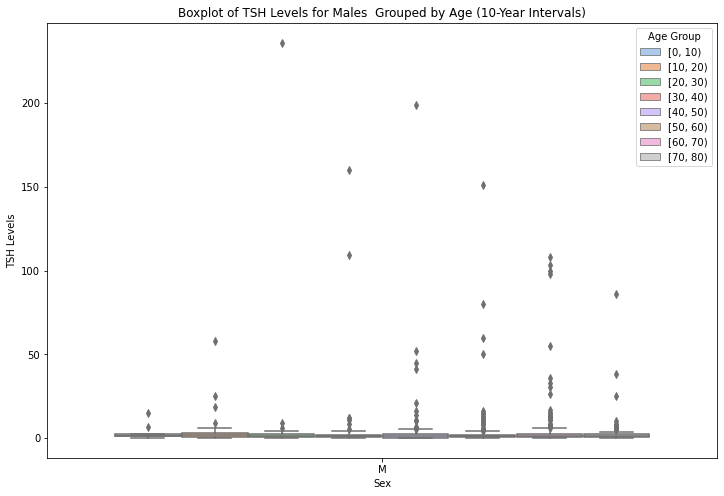

In [24]:
# Convert 'TSH' column to numeric
df['TSH'] = pd.to_numeric(df['TSH'], errors='coerce')

# Filter the DataFrame for females
male_data = df[df['sex'] == 'M']

# Create a new column for age groups (grouped in 10-year intervals)
male_data['age_group'] = pd.cut(male_data['age'], bins=range(0, 101, 10), right=False)

# Create a boxplot with 'sex' on x-axis and 'age_group' as hue
plt.figure(figsize=(12, 8))
sns.boxplot(x='sex', y='TSH', hue='age_group', data=female_data, palette='pastel')

# Set plot labels and title
plt.xlabel('Sex')
plt.ylabel('TSH Levels')
plt.title('Boxplot of TSH Levels for Males  Grouped by Age (10-Year Intervals)')

# Show the legend
plt.legend(title='Age Group', loc='upper right')

# Show the plot
plt.show()

In [25]:
# Assuming 'TSH' is the column with outliers in the male_data DataFrame
Q1_male = male_data['TSH'].quantile(0.25)
Q3_male = male_data['TSH'].quantile(0.75)
IQR_male = Q3_male - Q1_male

# Filter out values outside the IQR range for males
male_data_no_outliers = male_data[(male_data['TSH'] >= Q1_male - 1.5 * IQR_male) & (male_data['TSH'] <= Q3_male + 1.5 * IQR_male)]

Covariance Matrix:
            TSH
TSH  601.302511


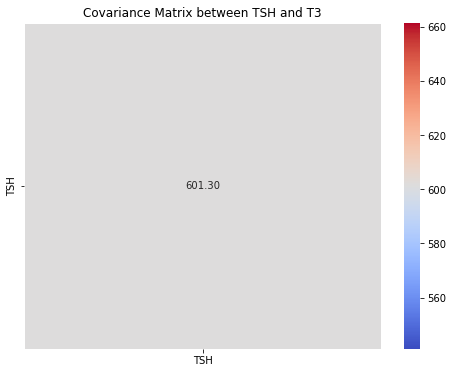

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'TSH' and 'T3' are the correct column names
# Select the relevant columns for visualization
selected_columns = ['TSH', 'T3']

# Filter the DataFrame to include only the selected columns
selected_data = df[selected_columns]

# Calculate the covariance matrix
covariance_matrix = selected_data.cov()

# Display the covariance matrix
print("Covariance Matrix:")
print(covariance_matrix)

# Create a heatmap for the covariance matrix
plt.figure(figsize=(8, 6))
sns.heatmap(covariance_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Set plot title
plt.title('Covariance Matrix between TSH and T3')

# Show the plot
plt.show()


In [27]:
selected_columns = ['TSH', 'T3']

# Filter the DataFrame to include only the selected columns
selected_data = df[selected_columns]

# Convert columns to numeric types
selected_data['TSH'] = pd.to_numeric(selected_data['TSH'], errors='coerce')
selected_data['T3'] = pd.to_numeric(selected_data['T3'], errors='coerce')

# Drop rows with missing values
selected_data = selected_data.dropna()

# Calculate the correlation coefficient
correlation_coefficient = selected_data['TSH'].corr(selected_data['T3'])

# Display the correlation coefficient
print(f"Correlation Coefficient between TSH and T3: {correlation_coefficient:.4f}")


Correlation Coefficient between TSH and T3: -0.1618


C:\Users\DELL\AppData\Local\Temp/ipykernel_13164/1093736830.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['TSH'] = pd.to_numeric(selected_data['TSH'], errors='coerce')
C:\Users\DELL\AppData\Local\Temp/ipykernel_13164/1093736830.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['T3'] = pd.to_numeric(selected_data['T3'], errors='coerce')


In [28]:
selected_columns = ['TSH', 'TT4']

# Filter the DataFrame to include only the selected columns
selected_data = df[selected_columns]

# Convert columns to numeric types
selected_data['TSH'] = pd.to_numeric(selected_data['TSH'], errors='coerce')
selected_data['TT4'] = pd.to_numeric(selected_data['TT4'], errors='coerce')

# Drop rows with missing values
selected_data = selected_data.dropna()

# Calculate the correlation coefficient
correlation_coefficient_tt4 = selected_data['TSH'].corr(selected_data['TT4'])

# Display the correlation coefficient
print(f"Correlation Coefficient between TSH and TT4: {correlation_coefficient_tt4:.4f}")


Correlation Coefficient between TSH and TT4: -0.2674


C:\Users\DELL\AppData\Local\Temp/ipykernel_13164/1871058780.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['TSH'] = pd.to_numeric(selected_data['TSH'], errors='coerce')
C:\Users\DELL\AppData\Local\Temp/ipykernel_13164/1871058780.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['TT4'] = pd.to_numeric(selected_data['TT4'], errors='coerce')


In [29]:
print(selected_data.isnull().sum())


TSH    0
TT4    0
dtype: int64


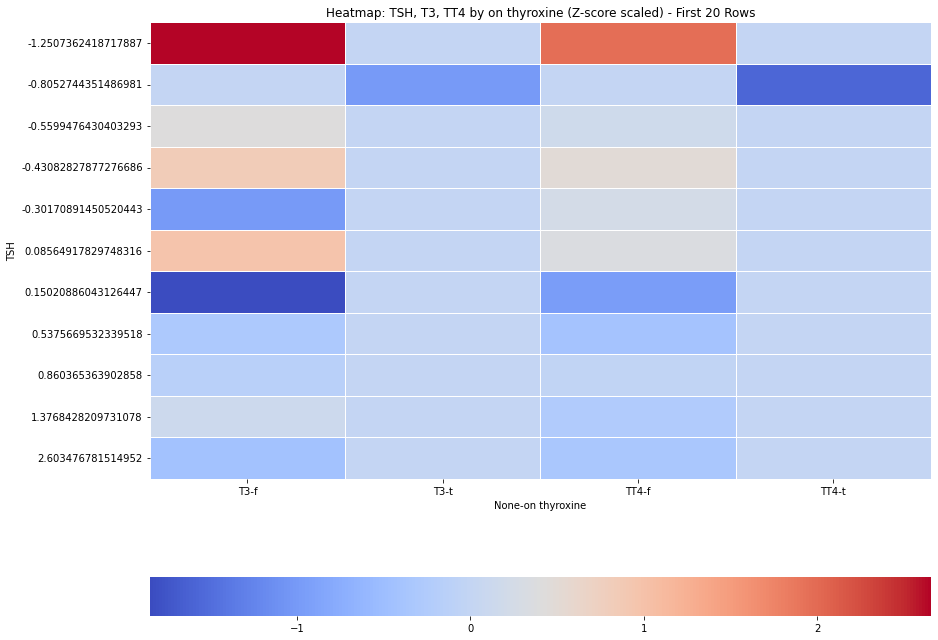

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Select the relevant columns
selected_columns = ['on thyroxine', 'TSH', 'T3', 'TT4']

# Filter the DataFrame to include only the selected columns and the first 20 rows
selected_data = df[selected_columns].head(20)

# Replace or remove non-numeric values in numerical columns
selected_data[['TSH', 'T3', 'TT4']] = selected_data[['TSH', 'T3', 'TT4']].replace({'?': np.nan}).astype(float)
selected_data = selected_data.dropna()

# Separate numerical and non-numerical columns
numerical_columns = selected_data[['TSH', 'T3', 'TT4']]
non_numerical_columns = selected_data[['on thyroxine']]

# Standardize numerical columns using Z-score scaling
scaler = StandardScaler()
numerical_columns_scaled = scaler.fit_transform(numerical_columns)

# Combine the standardized numerical columns with non-numerical columns
selected_data_scaled = pd.DataFrame(data=numerical_columns_scaled, columns=numerical_columns.columns)
selected_data_scaled['on thyroxine'] = non_numerical_columns

# Create a heatmap
plt.figure(figsize=(14, 12))

# Use the 'on thyroxine' column as the hue to differentiate categories
heatmap_data = selected_data_scaled.pivot_table(index='TSH', columns=['on thyroxine'], aggfunc='mean', fill_value=0)
sns.heatmap(heatmap_data, annot=False, cmap='coolwarm', linewidths=.5, cbar_kws={"orientation": "horizontal"})

# Set plot title
plt.title('Heatmap: TSH, T3, TT4 by on thyroxine (Z-score scaled) - First 20 Rows')

# Show the plot   
plt.show()


In [31]:
#Anova 
from scipy.stats import ttest_ind

# Separate data into on and off thyroxine groups
on_thyroxine_data = df[df['on thyroxine'] == 'T']['TSH']
off_thyroxine_data = df[df['on thyroxine'] == 'F']['TSH']

# Perform independent t-test
t_statistic, p_value = ttest_ind(on_thyroxine_data, off_thyroxine_data, equal_var=False)

# Set significance level
alpha = 0.05

# Check if the p-value is less than alpha to reject the null hypothesis
if p_value < alpha:
    print(f'Reject the null hypothesis. There is a significant difference in TSH levels between on and off thyroxine groups.')
else:
    print('Fail to reject the null hypothesis. There is no significant difference in TSH levels between on and off thyroxine groups.')


Fail to reject the null hypothesis. There is no significant difference in TSH levels between on and off thyroxine groups.


In [32]:
from scipy.stats import ttest_ind, zscore

# Separate data into on and off thyroxine groups
on_thyroxine_data = df[df['on thyroxine'] == 'T']['TSH']
off_thyroxine_data = df[df['on thyroxine'] == 'F']['TSH']

# Perform independent t-test
t_statistic, p_value_t = ttest_ind(on_thyroxine_data, off_thyroxine_data, equal_var=False)

# Check if the sample sizes are large enough for a z-test
if len(on_thyroxine_data) > 30 and len(off_thyroxine_data) > 30:
    # Perform z-test
    z_stat, p_value_z = zscore(on_thyroxine_data), zscore(off_thyroxine_data)
else:
    p_value_z = None  # Set to None if the z-test is not performed

# Set significance level
alpha = 0.05

# Check t-test results
if p_value_t < alpha:
    print(f'T-Test: Reject the null hypothesis. There is a significant difference in TSH levels between on and off thyroxine groups.')
else:
    print('T-Test: Fail to reject the null hypothesis. There is no significant difference in TSH levels between on and off thyroxine groups.')

# Check z-test results
if p_value_z is not None and p_value_z < alpha:
    print(f'Z-Test: Reject the null hypothesis. There is a significant difference in TSH levels between on and off thyroxine groups.')
elif p_value_z is not None:
    print('Z-Test: Fail to reject the null hypothesis. There is no significant difference in TSH levels between on and off thyroxine groups.')
else:
    print('Z-Test: Not performed due to small sample sizes.')





T-Test: Fail to reject the null hypothesis. There is no significant difference in TSH levels between on and off thyroxine groups.
Z-Test: Not performed due to small sample sizes.


In [33]:
from scipy.stats import chi2_contingency
# You may need to adjust the bin edges based on your data distribution
bin_edges = [0, 2, 5, 10, 20, 50, float('inf')]
bin_labels = ['0-2', '2-5', '5-10', '10-20', '20-50', '50+']

# Create a new column 'TSH_bins' based on binning
df['TSH_bins'] = pd.cut(df['TSH'], bins=bin_edges, labels=bin_labels)

# Create a contingency table
contingency_table = pd.crosstab(df['on thyroxine'], df['TSH_bins'])

# Perform chi-square test
chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)

# Set significance level
alpha = 0.05

# Check chi-square test results
if p_value < alpha:
    print(f'Chi-Square Test: Reject the null hypothesis. There is a significant relationship between "on thyroxine" and "TSH" levels.')
else:
    print('Chi-Square Test: Fail to reject the null hypothesis. There is no significant relationship between "on thyroxine" and "TSH" levels.')


Chi-Square Test: Reject the null hypothesis. There is a significant relationship between "on thyroxine" and "TSH" levels.


In [34]:
#LDA 
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Define features and target variable
features = ['TSH', 'T3', 'TT4']
target = 'on thyroxine'

# Encode boolean values into numerical values (0 and 1)
label_encoder = LabelEncoder()
df[target] = label_encoder.fit_transform(df[target])

# Handle missing values by replacing '?' with the mean of each column
df.replace('?', float('nan'), inplace=True)
imputer = SimpleImputer(strategy='mean')
df[features] = imputer.fit_transform(df[features])

# Split the data into training and test sets (80% train, 20% test)
train_data, test_data, train_target, test_target = train_test_split(
    df[features], df[target], test_size=0.2, random_state=42
)

# Initialize the LDA model
lda = LinearDiscriminantAnalysis()

# Fit the model on the training data
lda.fit(train_data, train_target)

# Make predictions on the test data
predictions = lda.predict(test_data)

# Evaluate the accuracy of the model
accuracy = accuracy_score(test_target, predictions)
print(f'Accuracy: {accuracy * 100:.2f}%')



Accuracy: 86.75%


In [35]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, make_scorer
# Define features and target variable
features = ['TSH', 'T3', 'TT4']
target = 'on thyroxine'

# Encode boolean values into numerical values (0 and 1)
label_encoder = LabelEncoder()
df[target] = label_encoder.fit_transform(df[target])

# Handle missing values by replacing '?' with the mean of each column
df.replace('?', float('nan'), inplace=True)
imputer = SimpleImputer(strategy='mean')
df[features] = imputer.fit_transform(df[features])

# Initialize the LDA model
lda = LinearDiscriminantAnalysis()

# Set up cross-validation with 10 folds
cross_val_accuracy = cross_val_score(lda, df[features], df[target], cv=10, scoring=make_scorer(accuracy_score))

# Print the accuracy for each fold
for fold, accuracy in enumerate(cross_val_accuracy, start=1):
    print(f'Fold {fold}: Accuracy = {accuracy * 100:.2f}%')

# Print the average accuracy across all folds
print(f'Average Accuracy: {cross_val_accuracy.mean() * 100:.2f}%')


Fold 1: Accuracy = 87.57%
Fold 2: Accuracy = 87.83%
Fold 3: Accuracy = 88.33%
Fold 4: Accuracy = 86.74%
Fold 5: Accuracy = 87.53%
Fold 6: Accuracy = 86.74%
Fold 7: Accuracy = 87.80%
Fold 8: Accuracy = 85.94%
Fold 9: Accuracy = 87.53%
Fold 10: Accuracy = 87.00%
Average Accuracy: 87.30%


In [36]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
# Define features and target variable
features = ['TSH', 'T3', 'TT4']
target = 'on thyroxine'

# Encode boolean values into numerical values (0 and 1)
label_encoder = LabelEncoder()
df[target] = label_encoder.fit_transform(df[target])

# Handle missing values by replacing '?' with the mean of each column
df.replace('?', float('nan'), inplace=True)
imputer = SimpleImputer(strategy='mean')
df[features] = imputer.fit_transform(df[features])

# Initialize the LDA model
lda = LinearDiscriminantAnalysis()

# Make predictions using cross-validation
predictions = cross_val_predict(lda, df[features], df[target], cv=10)

# Calculate and display the confusion matrix
conf_matrix = confusion_matrix(df[target], predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate and display accuracy, error rate, precision, recall, and F1-score
accuracy = accuracy_score(df[target], predictions)
error_rate = 1 - accuracy
precision = precision_score(df[target], predictions)
recall = recall_score(df[target], predictions)
f1 = f1_score(df[target], predictions)

print("\nAccuracy:", accuracy)
print("Error Rate:", error_rate)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Confusion Matrix:
[[3269   39]
 [ 440   24]]

Accuracy: 0.8730116648992576
Error Rate: 0.12698833510074237
Precision: 0.38095238095238093
Recall: 0.05172413793103448
F1-score: 0.09108159392789375


In [37]:

# Define features and target variable
features = ['TSH', 'T3', 'TT4']
target = 'on thyroxine'

# Encode boolean values into numerical values (0 and 1)
label_encoder = LabelEncoder()
df[target] = label_encoder.fit_transform(df[target])

# Handle missing values by replacing '?' with the mean of each column
df.replace('?', float('nan'), inplace=True)
imputer = SimpleImputer(strategy='mean')
df[features] = imputer.fit_transform(df[features])

# Split the data into training and test sets (80% train, 20% test)
train_data, test_data, train_target, test_target = train_test_split(
    df[features], df[target], test_size=0.2, random_state=42
)

# Initialize the LDA model
lda = LinearDiscriminantAnalysis()

# Fit the model on the training data
lda.fit(train_data, train_target)

# Make predictions on both training and test sets
train_predictions = lda.predict(train_data)
test_predictions = lda.predict(test_data)

# Calculate accuracy on both sets
train_accuracy = accuracy_score(train_target, train_predictions)
test_accuracy = accuracy_score(test_target, test_predictions)

print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Compare training and test accuracies to detect overfitting or underfitting
if train_accuracy > test_accuracy:
    print("The model may be overfitting.")
elif train_accuracy < test_accuracy:
    print("The model may be underfitting.")
else:
    print("The model's performance is consistent on both training and test sets.")


Training Accuracy: 87.60%
Test Accuracy: 86.75%
The model may be overfitting.


In [38]:
# PCA 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
# Define features and target variable
features = ['TSH', 'T3', 'TT4']
target = 'on thyroxine'

# Encode boolean values into numerical values (0 and 1)
label_encoder = LabelEncoder()
df[target] = label_encoder.fit_transform(df[target])

# Handle missing values by replacing '?' with the mean of each column
df.replace('?', float('nan'), inplace=True)
imputer = SimpleImputer(strategy='mean')
df[features] = imputer.fit_transform(df[features])

# Split the data into training and test sets (80% train, 20% test)
train_data, test_data, train_target, test_target = train_test_split(
    df[features], df[target], test_size=0.2, random_state=42
)

# Standardize the data (important for PCA)
scaler = StandardScaler()

# Initialize PCA with the number of components you want to retain
pca = PCA(n_components=2)

# Create a pipeline with scaling and PCA
pca_pipeline = make_pipeline(scaler, pca)

# Fit and transform the training data
train_data_pca = pca_pipeline.fit_transform(train_data)

# Transform the test data
test_data_pca = pca_pipeline.transform(test_data)
# Initialize Logistic Regression model
model = LogisticRegression(random_state=42)

# Train the model on the PCA-transformed training data
model.fit(train_data_pca, train_target)

# Make predictions on the test data
predictions = model.predict(test_data_pca)

# Evaluate the accuracy of the model
accuracy = accuracy_score(test_target, predictions)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 86.75%


In [39]:
num_folds = 10

# Initialize Logistic Regression model
model = LogisticRegression(random_state=42)

# Initialize PCA with 2 components
pca = PCA(n_components=2)

# Standardize the data (important for PCA)
scaler = StandardScaler()

# Create a pipeline with scaling and PCA
pca_pipeline = make_pipeline(scaler, pca)

# Combine PCA and the model into a single pipeline
full_pipeline = make_pipeline(pca_pipeline, model)

# Use KFold cross-validation to apply PCA in each fold
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(full_pipeline, train_data_pca, train_target, cv=kf, scoring='accuracy')

# Print the cross-validated accuracy scores for each fold
for fold, score in enumerate(cv_scores, start=1):
    print(f'Fold {fold}: Accuracy = {score * 100:.2f}%')

# Print the average accuracy across all folds
average_accuracy = np.mean(cv_scores)
print(f'Average Accuracy: {average_accuracy * 100:.2f}%')

Fold 1: Accuracy = 88.41%
Fold 2: Accuracy = 90.07%
Fold 3: Accuracy = 89.74%
Fold 4: Accuracy = 86.42%
Fold 5: Accuracy = 89.07%
Fold 6: Accuracy = 89.40%
Fold 7: Accuracy = 87.42%
Fold 8: Accuracy = 87.38%
Fold 9: Accuracy = 86.38%
Fold 10: Accuracy = 84.39%
Average Accuracy: 87.87%


In [40]:
# Choose the number of folds (e.g., 10-fold cross-validation)
num_folds = 10

# Initialize Logistic Regression model
model = LogisticRegression(random_state=42)

# Initialize PCA with 2 components
pca = PCA(n_components=2)

# Standardize the data (important for PCA)
scaler = StandardScaler()

# Create a pipeline with scaling and PCA
pca_pipeline = make_pipeline(scaler, pca)

# Combine PCA and the model into a single pipeline
full_pipeline = make_pipeline(pca_pipeline, model)

# Use KFold cross-validation to apply PCA in each fold
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation
predictions = cross_val_predict(full_pipeline, train_data_pca, train_target, cv=kf)

# Calculate and display the confusion matrix
conf_matrix = confusion_matrix(train_target, predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate and display accuracy, error rate, precision, recall, and F1-score
accuracy = accuracy_score(train_target, predictions)
error_rate = 1 - accuracy
precision = precision_score(train_target, predictions)
recall = recall_score(train_target, predictions)
f1 = f1_score(train_target, predictions)

print("\nAccuracy:", accuracy)
print("Error Rate:", error_rate)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Determine if the model is overfitting or underfitting
if accuracy > 0.95:
    print("The model may be overfitting.")
elif accuracy < 0.80:
    print("The model may be underfitting.")
else:
    print("The model's performance is reasonable.")


Confusion Matrix:
[[2650    2]
 [ 364    1]]

Accuracy: 0.8786874378521711
Error Rate: 0.12131256214782893
Precision: 0.3333333333333333
Recall: 0.0027397260273972603
F1-score: 0.005434782608695653
The model's performance is reasonable.


In [41]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Define features and target variable
features = ['TSH', 'T3', 'TT4']
target = 'on thyroxine'

# Encode boolean values into numerical values (0 and 1)
label_encoder = LabelEncoder()
df[target] = label_encoder.fit_transform(df[target])

# Handle missing values by replacing '?' with the mean of each column
df.replace('?', float('nan'), inplace=True)
imputer = SimpleImputer(strategy='mean')
df[features] = imputer.fit_transform(df[features])

# Split the data into training and test sets (80% train, 20% test)
train_data, test_data, train_target, test_target = train_test_split(
    df[features], df[target], test_size=0.2, random_state=42
)

# Initialize Gaussian Naive Bayes model
nb_model = GaussianNB()

# Train the model on the training data
nb_model.fit(train_data, train_target)

# Make predictions on the test data
predictions = nb_model.predict(test_data)

# Calculate and print the accuracy
accuracy = accuracy_score(test_target, predictions)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 86.23%


In [42]:
# Define features and target variable
features = ['TSH', 'T3', 'TT4']
target = 'on thyroxine'

# Encode boolean values into numerical values (0 and 1)
label_encoder = LabelEncoder()
df[target] = label_encoder.fit_transform(df[target])

# Handle missing values by replacing '?' with the mean of each column
df.replace('?', float('nan'), inplace=True)
imputer = SimpleImputer(strategy='mean')
df[features] = imputer.fit_transform(df[features])

# Initialize Gaussian Naive Bayes model
nb_model = GaussianNB()

# Use KFold cross-validation with 10 folds
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(nb_model, df[features], df[target], cv=kf, scoring='accuracy')

# Print the cross-validated accuracy scores for each fold
for fold, score in enumerate(cv_scores, start=1):
    print(f'Fold {fold}: Accuracy = {score * 100:.2f}%')

# Print the average accuracy across all folds
average_accuracy = cv_scores.mean()
print(f'Average Accuracy: {average_accuracy * 100:.2f}%')

Fold 1: Accuracy = 86.24%
Fold 2: Accuracy = 85.98%
Fold 3: Accuracy = 89.12%
Fold 4: Accuracy = 87.80%
Fold 5: Accuracy = 84.88%
Fold 6: Accuracy = 86.47%
Fold 7: Accuracy = 84.35%
Fold 8: Accuracy = 88.86%
Fold 9: Accuracy = 85.94%
Fold 10: Accuracy = 88.86%
Average Accuracy: 86.85%


In [43]:
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB

# Define features and target variable
features = ['TSH', 'T3', 'TT4']
target = 'on thyroxine'

# Encode boolean values into numerical values (0 and 1)
label_encoder = LabelEncoder()
df[target] = label_encoder.fit_transform(df[target])

# Handle missing values by replacing '?' with the mean of each column
df.replace('?', float('nan'), inplace=True)
imputer = SimpleImputer(strategy='mean')
df[features] = imputer.fit_transform(df[features])

# Initialize Gaussian Naive Bayes model
nb_model = GaussianNB()

# Use KFold cross-validation with 10 folds
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation
predictions = cross_val_predict(nb_model, df[features], df[target], cv=kf)

# Calculate and display the confusion matrix
conf_matrix = confusion_matrix(df[target], predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate and display accuracy, error rate, precision, recall, and F1-score
accuracy = accuracy_score(df[target], predictions)
error_rate = 1 - accuracy
precision = precision_score(df[target], predictions)
recall = recall_score(df[target], predictions)
f1 = f1_score(df[target], predictions)

print("\nAccuracy:", accuracy)
print("Error Rate:", error_rate)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Determine if the model is overfitting or underfitting
if accuracy > 0.95:
    print("The model may be overfitting.")
elif accuracy < 0.80:
    print("The model may be underfitting.")
else:
    print("The model's performance is reasonable.")


Confusion Matrix:
[[3254   54]
 [ 442   22]]

Accuracy: 0.8685047720042418
Error Rate: 0.1314952279957582
Precision: 0.2894736842105263
Recall: 0.04741379310344827
F1-score: 0.08148148148148147
The model's performance is reasonable.


In [1]:
import pymc3 as pm
import numpy as np

# Generate synthetic data 
np.random.seed(42)
n_samples = 1000
TSH = np.random.normal(2.5, 1.0, n_samples)
T3 = np.random.normal(3.0, 1.2, n_samples)
TT4 = np.random.normal(100, 15, n_samples)

# Assume on_thyroxine is influenced by TSH, T3, and TT4
on_thyroxine_prob = pm.invlogit(0.5 * TSH - 0.8 * T3 + 0.2 * TT4)

# Simulate binary on_thyroxine values based on probabilities
on_thyroxine = np.random.binomial(1, on_thyroxine_prob)

# Build Bayesian network model
with pm.Model() as model:
    # Priors for parameters
    alpha = pm.Normal('alpha', mu=0, sd=10)
    beta_tsh = pm.Normal('beta_tsh', mu=0, sd=1)
    beta_t3 = pm.Normal('beta_t3', mu=0, sd=1)
    beta_tt4 = pm.Normal('beta_tt4', mu=0, sd=1)

    # Linear combination
    eta = alpha + beta_tsh * TSH + beta_t3 * T3 + beta_tt4 * TT4

    # Logistic function to model probability
    p = pm.invlogit(eta)

    # Binary likelihood (on_thyroxine)
    on_thyroxine_obs = pm.Bernoulli('on_thyroxine_obs', p, observed=on_thyroxine)

# Perform inference
with model:
    trace = pm.sample(1000, tune=1000)

# Print summary statistics
print(pm.summary(trace))



ModuleNotFoundError: No module named 'pymc3'

In [45]:
from sklearn.tree import DecisionTreeClassifier

# Define features and target variable
features = ['TSH', 'T3', 'TT4']
target = 'on thyroxine'

# Encode boolean values into numerical values (0 and 1)
label_encoder = LabelEncoder()
df[target] = label_encoder.fit_transform(df[target])

# Handle missing values by replacing '?' with the mean of each column
df.replace('?', float('nan'), inplace=True)
imputer = SimpleImputer(strategy='mean')
df[features] = imputer.fit_transform(df[features])

# Split the data into training and test sets
train_data, test_data, train_target, test_target = train_test_split(
    df[features], df[target], test_size=0.2, random_state=42
)

# Initialize Decision Tree model with entropy criterion
dt_model = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Train the model on the training data
dt_model.fit(train_data, train_target)

# Make predictions on the test data
predictions = dt_model.predict(test_data)

# Calculate and print the accuracy
accuracy = accuracy_score(test_target, predictions)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Estimate error (misclassification rate)
error_rate = 1 - accuracy
print(f'Error Rate: {error_rate * 100:.2f}%')


Accuracy: 80.66%
Error Rate: 19.34%


In [46]:
# Encode boolean values into numerical values (0 and 1)
label_encoder = LabelEncoder()
df[target] = label_encoder.fit_transform(df[target])

# Handle missing values by replacing '?' with the mean of each column
df.replace('?', float('nan'), inplace=True)
imputer = SimpleImputer(strategy='mean')
df[features] = imputer.fit_transform(df[features])

# Initialize Decision Tree model with entropy criterion
dt_model = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Use KFold cross-validation with 10 folds
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(dt_model, df[features], df[target], cv=kf, scoring='accuracy')

# Print the cross-validated accuracy scores for each fold
for fold, score in enumerate(cv_scores, start=1):
    print(f'Fold {fold}: Accuracy = {score * 100:.2f}%')

# Print the average accuracy across all folds
average_accuracy = cv_scores.mean()
print(f'Average Accuracy: {average_accuracy * 100:.2f}%')

# Estimate error (misclassification rate)
error_rate = 1 - average_accuracy
print(f'Error Rate: {error_rate * 100:.2f}%')

Fold 1: Accuracy = 82.80%
Fold 2: Accuracy = 82.01%
Fold 3: Accuracy = 83.55%
Fold 4: Accuracy = 83.29%
Fold 5: Accuracy = 78.51%
Fold 6: Accuracy = 80.11%
Fold 7: Accuracy = 81.43%
Fold 8: Accuracy = 81.96%
Fold 9: Accuracy = 81.17%
Fold 10: Accuracy = 81.96%
Average Accuracy: 81.68%
Error Rate: 18.32%


In [47]:
# Define features and target variable
features = ['TSH', 'T3', 'TT4']
target = 'on thyroxine'

# Encode boolean values into numerical values (0 and 1)
label_encoder = LabelEncoder()
df[target] = label_encoder.fit_transform(df[target])

# Handle missing values by replacing '?' with the mean of each column
df.replace('?', float('nan'), inplace=True)
imputer = SimpleImputer(strategy='mean')
df[features] = imputer.fit_transform(df[features])

# Initialize Decision Tree model with entropy criterion
dt_model = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Use KFold cross-validation with 10 folds
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation
predictions = cross_val_predict(dt_model, df[features], df[target], cv=kf)

# Calculate and display the confusion matrix
conf_matrix = confusion_matrix(df[target], predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate and display accuracy
accuracy = accuracy_score(df[target], predictions)
print("\nAccuracy:", accuracy)

# Determine if the model is overfitting or underfitting
if accuracy > 0.95:
    print("The model may be overfitting.")
elif accuracy < 0.80:
    print("The model may be underfitting.")
else:
    print("The model's performance is reasonable.")


Confusion Matrix:
[[2957  351]
 [ 340  124]]

Accuracy: 0.8168080593849417
The model's performance is reasonable.


In [48]:
# knn Eculidian distance 
from sklearn.neighbors import KNeighborsClassifier

# Define features and target variable
features = ['TSH', 'T3', 'TT4']
target = 'on thyroxine'

# Encode boolean values into numerical values (0 and 1)
label_encoder = LabelEncoder()
df[target] = label_encoder.fit_transform(df[target])

# Handle missing values by replacing '?' with the mean of each column
df.replace('?', float('nan'), inplace=True)
imputer = SimpleImputer(strategy='mean')
df[features] = imputer.fit_transform(df[features])

# Split the data into training and test sets
train_data, test_data, train_target, test_target = train_test_split(
    df[features], df[target], test_size=0.2, random_state=42
)

# Initialize KNN model with Euclidean distance
knn_model_euclidean = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

# Train the model on the training data
knn_model_euclidean.fit(train_data, train_target)

# Make predictions on the test data
predictions_euclidean = knn_model_euclidean.predict(test_data)

# Calculate and print the accuracy for Euclidean distance
accuracy_euclidean = accuracy_score(test_target, predictions_euclidean)
print(f'Accuracy with Euclidean Distance: {accuracy_euclidean * 100:.2f}%')


Accuracy with Euclidean Distance: 86.09%


In [49]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Define features and target variable
features = ['TSH', 'T3', 'TT4']
target = 'on thyroxine'

# Encode boolean values into numerical values (0 and 1)
label_encoder = LabelEncoder()
df[target] = label_encoder.fit_transform(df[target])

# Handle missing values by replacing '?' with the mean of each column
df.replace('?', float('nan'), inplace=True)
imputer = SimpleImputer(strategy='mean')
df[features] = imputer.fit_transform(df[features])

# Initialize KNN model with Euclidean distance
knn_euclidean = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

# Use KFold cross-validation with 10 folds
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores_euclidean = cross_val_score(knn_euclidean, df[features], df[target], cv=kf, scoring='accuracy')

# Print the cross-validated accuracy scores for each fold
for fold, score in enumerate(cv_scores_euclidean, start=1):
    print(f'Fold {fold}: Accuracy with Euclidean Distance = {score * 100:.2f}%')

# Print the average accuracy across all folds
average_accuracy_euclidean = cv_scores_euclidean.mean()
print(f'Average Accuracy with Euclidean Distance: {average_accuracy_euclidean * 100:.2f}%')


Fold 1: Accuracy with Euclidean Distance = 87.30%
Fold 2: Accuracy with Euclidean Distance = 85.45%
Fold 3: Accuracy with Euclidean Distance = 86.21%
Fold 4: Accuracy with Euclidean Distance = 85.15%
Fold 5: Accuracy with Euclidean Distance = 85.68%
Fold 6: Accuracy with Euclidean Distance = 84.88%
Fold 7: Accuracy with Euclidean Distance = 85.41%
Fold 8: Accuracy with Euclidean Distance = 87.00%
Fold 9: Accuracy with Euclidean Distance = 85.15%
Fold 10: Accuracy with Euclidean Distance = 88.33%
Average Accuracy with Euclidean Distance: 86.05%


In [50]:
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Define features and target variable
features = ['TSH', 'T3', 'TT4']
target = 'on thyroxine'

# Encode boolean values into numerical values (0 and 1)
label_encoder = LabelEncoder()
df[target] = label_encoder.fit_transform(df[target])

# Handle missing values by replacing '?' with the mean of each column
df.replace('?', float('nan'), inplace=True)
imputer = SimpleImputer(strategy='mean')
df[features] = imputer.fit_transform(df[features])

# Initialize KNN model with Euclidean distance
knn_euclidean = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

# Use KFold cross-validation with 10 folds
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation
predictions_euclidean = cross_val_predict(knn_euclidean, df[features], df[target], cv=kf)

# Calculate and display the confusion matrix
conf_matrix_euclidean = confusion_matrix(df[target], predictions_euclidean)
print("Confusion Matrix with Euclidean Distance:")
print(conf_matrix_euclidean)

# Calculate and display accuracy
accuracy_euclidean = accuracy_score(df[target], predictions_euclidean)
print("\nAccuracy with Euclidean Distance:", accuracy_euclidean)

# Determine if the model is overfitting or underfitting
if accuracy_euclidean > 0.95:
    print("The model may be overfitting.")
elif accuracy_euclidean < 0.80:
    print("The model may be underfitting.")
else:
    print("The model's performance is reasonable.")


Confusion Matrix with Euclidean Distance:
[[3177  131]
 [ 395   69]]

Accuracy with Euclidean Distance: 0.8605514316012726
The model's performance is reasonable.


In [51]:
# Initialize KNN model with Manhattan distance
knn_manhattan = KNeighborsClassifier(n_neighbors=5, metric='manhattan')

# Train the model on the training data
knn_manhattan.fit(train_data, train_target)

# Make predictions on the test data
predictions_manhattan = knn_manhattan.predict(test_data)

# Calculate and print the accuracy for Manhattan distance
accuracy_manhattan = accuracy_score(test_target, predictions_manhattan)
print(f'Accuracy with Manhattan Distance: {accuracy_manhattan * 100:.2f}%')


Accuracy with Manhattan Distance: 86.75%


In [52]:
# Define features and target variable
features = ['TSH', 'T3', 'TT4']
target = 'on thyroxine'

# Encode boolean values into numerical values (0 and 1)
label_encoder = LabelEncoder()
df[target] = label_encoder.fit_transform(df[target])

# Handle missing values by replacing '?' with the mean of each column
df.replace('?', float('nan'), inplace=True)
imputer = SimpleImputer(strategy='mean')
df[features] = imputer.fit_transform(df[features])

# Initialize KNN model with Manhattan distance
knn_manhattan = KNeighborsClassifier(n_neighbors=5, metric='manhattan')

# Use KFold cross-validation with 10 folds
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores_manhattan = cross_val_score(knn_manhattan, df[features], df[target], cv=kf, scoring='accuracy')

# Print the cross-validated accuracy scores for each fold
for fold, score in enumerate(cv_scores_manhattan, start=1):
    print(f'Fold {fold}: Accuracy with Manhattan Distance = {score * 100:.2f}%')

# Print the average accuracy across all folds
average_accuracy_manhattan = cv_scores_manhattan.mean()
print(f'Average Accuracy with Manhattan Distance: {average_accuracy_manhattan * 100:.2f}%')


Fold 1: Accuracy with Manhattan Distance = 86.51%
Fold 2: Accuracy with Manhattan Distance = 85.98%
Fold 3: Accuracy with Manhattan Distance = 85.41%
Fold 4: Accuracy with Manhattan Distance = 85.15%
Fold 5: Accuracy with Manhattan Distance = 85.41%
Fold 6: Accuracy with Manhattan Distance = 84.08%
Fold 7: Accuracy with Manhattan Distance = 84.88%
Fold 8: Accuracy with Manhattan Distance = 87.00%
Fold 9: Accuracy with Manhattan Distance = 85.94%
Fold 10: Accuracy with Manhattan Distance = 88.59%
Average Accuracy with Manhattan Distance: 85.90%


In [53]:
# Define features and target variable
features = ['TSH', 'T3', 'TT4']
target = 'on thyroxine'

# Encode boolean values into numerical values (0 and 1)
label_encoder = LabelEncoder()
df[target] = label_encoder.fit_transform(df[target])

# Handle missing values by replacing '?' with the mean of each column
df.replace('?', float('nan'), inplace=True)
imputer = SimpleImputer(strategy='mean')
df[features] = imputer.fit_transform(df[features])

# Initialize KNN model with Manhattan distance
knn_manhattan = KNeighborsClassifier(n_neighbors=5, metric='manhattan')

# Use KFold cross-validation with 10 folds
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation
predictions_manhattan = cross_val_predict(knn_manhattan, df[features], df[target], cv=kf)

# Calculate and display the confusion matrix
conf_matrix_manhattan = confusion_matrix(df[target], predictions_manhattan)
print("Confusion Matrix with Manhattan Distance:")
print(conf_matrix_manhattan)

# Calculate and display accuracy
accuracy_manhattan = accuracy_score(df[target], predictions_manhattan)
print("\nAccuracy with Manhattan Distance:", accuracy_manhattan)

# Determine if the model is overfitting or underfitting
if accuracy_manhattan > 0.95:
    print("The model may be overfitting.")
elif accuracy_manhattan < 0.80:
    print("The model may be underfitting.")
else:
    print("The model's performance is reasonable.")


Confusion Matrix with Manhattan Distance:
[[3170  138]
 [ 394   70]]

Accuracy with Manhattan Distance: 0.8589607635206787
The model's performance is reasonable.


Data Set Information:
From Garavan Institute
Documentation: as given by Ross Quinlan
https://archive.ics.uci.edu/ml/datasets/Thyroid+Disease

Data set description 
The dataset contains a total of 3,772 entries, each corresponding to a unique patient, and encompasses 30 columns capturing various features relevant to thyroid-related conditions. The primary objective of the dataset is to assist in the detection of whether a patient should be prescribed thyroxine medication or not, based on the provided features
https://www.kaggle.com/datasets/yasserhessein/thyroid-disease-data-se

In [ ]:
athor works
https://www.kaggle.com/code/adiii1652/thyroid-disease-analysis(#K-Neighbour-Classifer)
https://www.kaggle.com/code/dhruv0206/thyroid-disease-detection-using-deep-learning(using deep learning)
    